In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
survey = pd.read_csv('2020 Stack Overflow Survey Responses.csv')
print(len(survey))
survey.head()

64461


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [3]:
schema = pd.read_csv('schema_20.csv')
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


In [4]:
def get_schema(column, schema = schema):
    """
    (column_name, dataframe) -> str
    function to get the question prompt for each column of the survey data
    >>> get_schema(Hobbyist)
    'Do you code as a hobby?'
    """
    desc = list(schema[schema.Column == column]['QuestionText'])[0]
    return desc

In [5]:
def get_unique(df_column, delimiter):
    """
    gets unique items in a pandas column where cells contain items with a delimiter
    df = pd.DataFrame({'col': ['A','B'], 'A', ['B','C'])
    >>> get_unique(df.col, ',')
    {'A','B','C'}
    """
    lst = df_column.dropna().astype(str).apply(lambda x: x.split(delimiter)).to_list()
    
    return list(set([item for sublist in lst for item in sublist]))

In [6]:
def split_and_join(df, col, delimiter):
    """
    splits a delimited column and add the resulting split to the original df while dropping the splitted column
    
    df: dataframe containing column col to be splitted
    col: column containing delimited items to be splitted
    delimiter: delimiter of items in column col
    """
    split_df = df[col].str.split(delimiter, n = -1, expand = True)
    other_columns = df.columns.tolist()
    other_columns.remove(col)
    
    split_df[other_columns] = df[other_columns]
    
    return split_df

## Business Questions
1. How often do developers seek help online?
2. What are the predominant undergraduate majors of developers?
3. What does the distribution of respondent ethnicity look like?

### 1. Undergraduate Major

In [7]:
get_schema('DevType')

'Which of the following describe you? Please select all that apply.'

In [8]:
survey['DevTypeCount'] = survey.groupby('DevType')['DevType'].transform('count')
survey.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,DevTypeCount
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27,300.0
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4,363.0
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A f

Several development roles were listed by respondents so the roles were split and only the first role was counted as this is expected to be the main role for each respondent.

In [9]:
# the text of the majors are long, they are abbreviated for easier wrangling

UndergradMajorMap = {'Computer science, computer engineering, or software engineering': 'CSE',
                    'Another engineering discipline (such as civil, electrical, mechanical, etc.)': 'Other Eng',
                    'Information systems, information technology, or system administration': 'IS,IT or sys adm',
                    'A natural science (such as biology, chemistry, physics, etc.)': 'Nat Sci',
                    'Mathematics or statistics': 'Math or Stat',
                    'Web development or web design': 'Web Dev/Design',
                    'A business discipline (such as accounting, finance, marketing, etc.)': 'Business',
                    'A humanities discipline (such as literature, history, philosophy, etc.)': 'Humanities',
                    'A social science (such as anthropology, psychology, political science, etc.)': 'Social Science',
                    'Fine arts or performing arts (such as graphic design, music, studio art, etc.)': 'FArts/PArts',
                    'I never declared a major':'Never Declared',
                    'A health science (such as nursing, pharmacy, radiology, etc.)': 'Health Science'}

In [10]:
survey['und_major'] = survey.UndergradMajor.replace(UndergradMajorMap)
survey.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,DevTypeCount,und_major
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27,300.0,CSE
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4,363.0,CSE
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN,NaN,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack 

In [11]:
dev_major = survey[['DevType', 'und_major']].dropna().reset_index(drop = True)
dev_major.head()

,DevType,und_major
0,"Developer, desktop or enterprise applications;...",CSE
1,"Developer, full-stack;Developer, mobile",CSE
2,"Developer, back-end;Developer, front-end;Devel...",CSE
3,"Developer, back-end;Developer, desktop or ente...",CSE
4,"Developer, full-stack",CSE


In [12]:
unique_devs = get_unique(survey.DevType, ';')
print(len(unique_devs))
unique_devs

23


['Data or business analyst',
 'Engineering manager',
 'Database administrator',
 'Scientist',
 'Product manager',
 'Developer, embedded applications or devices',
 'Engineer, site reliability',
 'Developer, mobile',
 'Developer, back-end',
 'Developer, front-end',
 'Developer, QA or test',
 'Academic researcher',
 'System administrator',
 'Senior executive/VP',
 'Marketing or sales professional',
 'Data scientist or machine learning specialist',
 'DevOps specialist',
 'Educator',
 'Engineer, data',
 'Developer, desktop or enterprise applications',
 'Designer',
 'Developer, game or graphics',
 'Developer, full-stack']

In [13]:
survey_dev = split_and_join(survey, 'DevType', ';')
# select all DevType, YearsCodePro and und_major for further analysis
survey_devMajor1 = survey_dev.iloc[:,np.r_[0:23,82,84]].fillna(value=np.nan)
survey_devMajor1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,YearsCodePro,und_major
0,"Developer, desktop or enterprise applications","Developer, full-stack",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,CSE
1,"Developer, full-stack","Developer, mobile",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,CSE
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,CSE
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,CSE


In [14]:
survey_devMajor = survey_devMajor1.melt(id_vars = ['und_major','YearsCodePro'], value_name = 'DevType')
survey_devMajor.dropna(axis = 0, how = 'any', subset = ['und_major', 'DevType'], inplace=True)
survey_devMajor = survey_devMajor.reset_index(drop = True)
survey_devMajor.head()

,und_major,YearsCodePro,variable,DevType
0,CSE,27,0,"Developer, desktop or enterprise applications"
1,CSE,4,0,"Developer, full-stack"
2,CSE,4,0,"Developer, back-end"
3,CSE,13,0,"Developer, back-end"
4,CSE,4,0,"Developer, full-stack"


In [15]:
survey_devMajor_grp = survey_devMajor.groupby(['DevType','und_major']).agg({'und_major':'count'})
survey_devMajor_grp.columns = ['major_count']
survey_devMajor_grp.reset_index(level=[0,1], inplace = True)
survey_devMajor_grp.sort_values(by = ['DevType', 'und_major'], inplace = True)
survey_devMajor_grp.head()

,DevType,und_major,major_count
0,Academic researcher,Business,45
1,Academic researcher,CSE,1853
2,Academic researcher,FArts/PArts,23
3,Academic researcher,Health Science,41
4,Academic researcher,Humanities,57


C:\Users\mikeo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


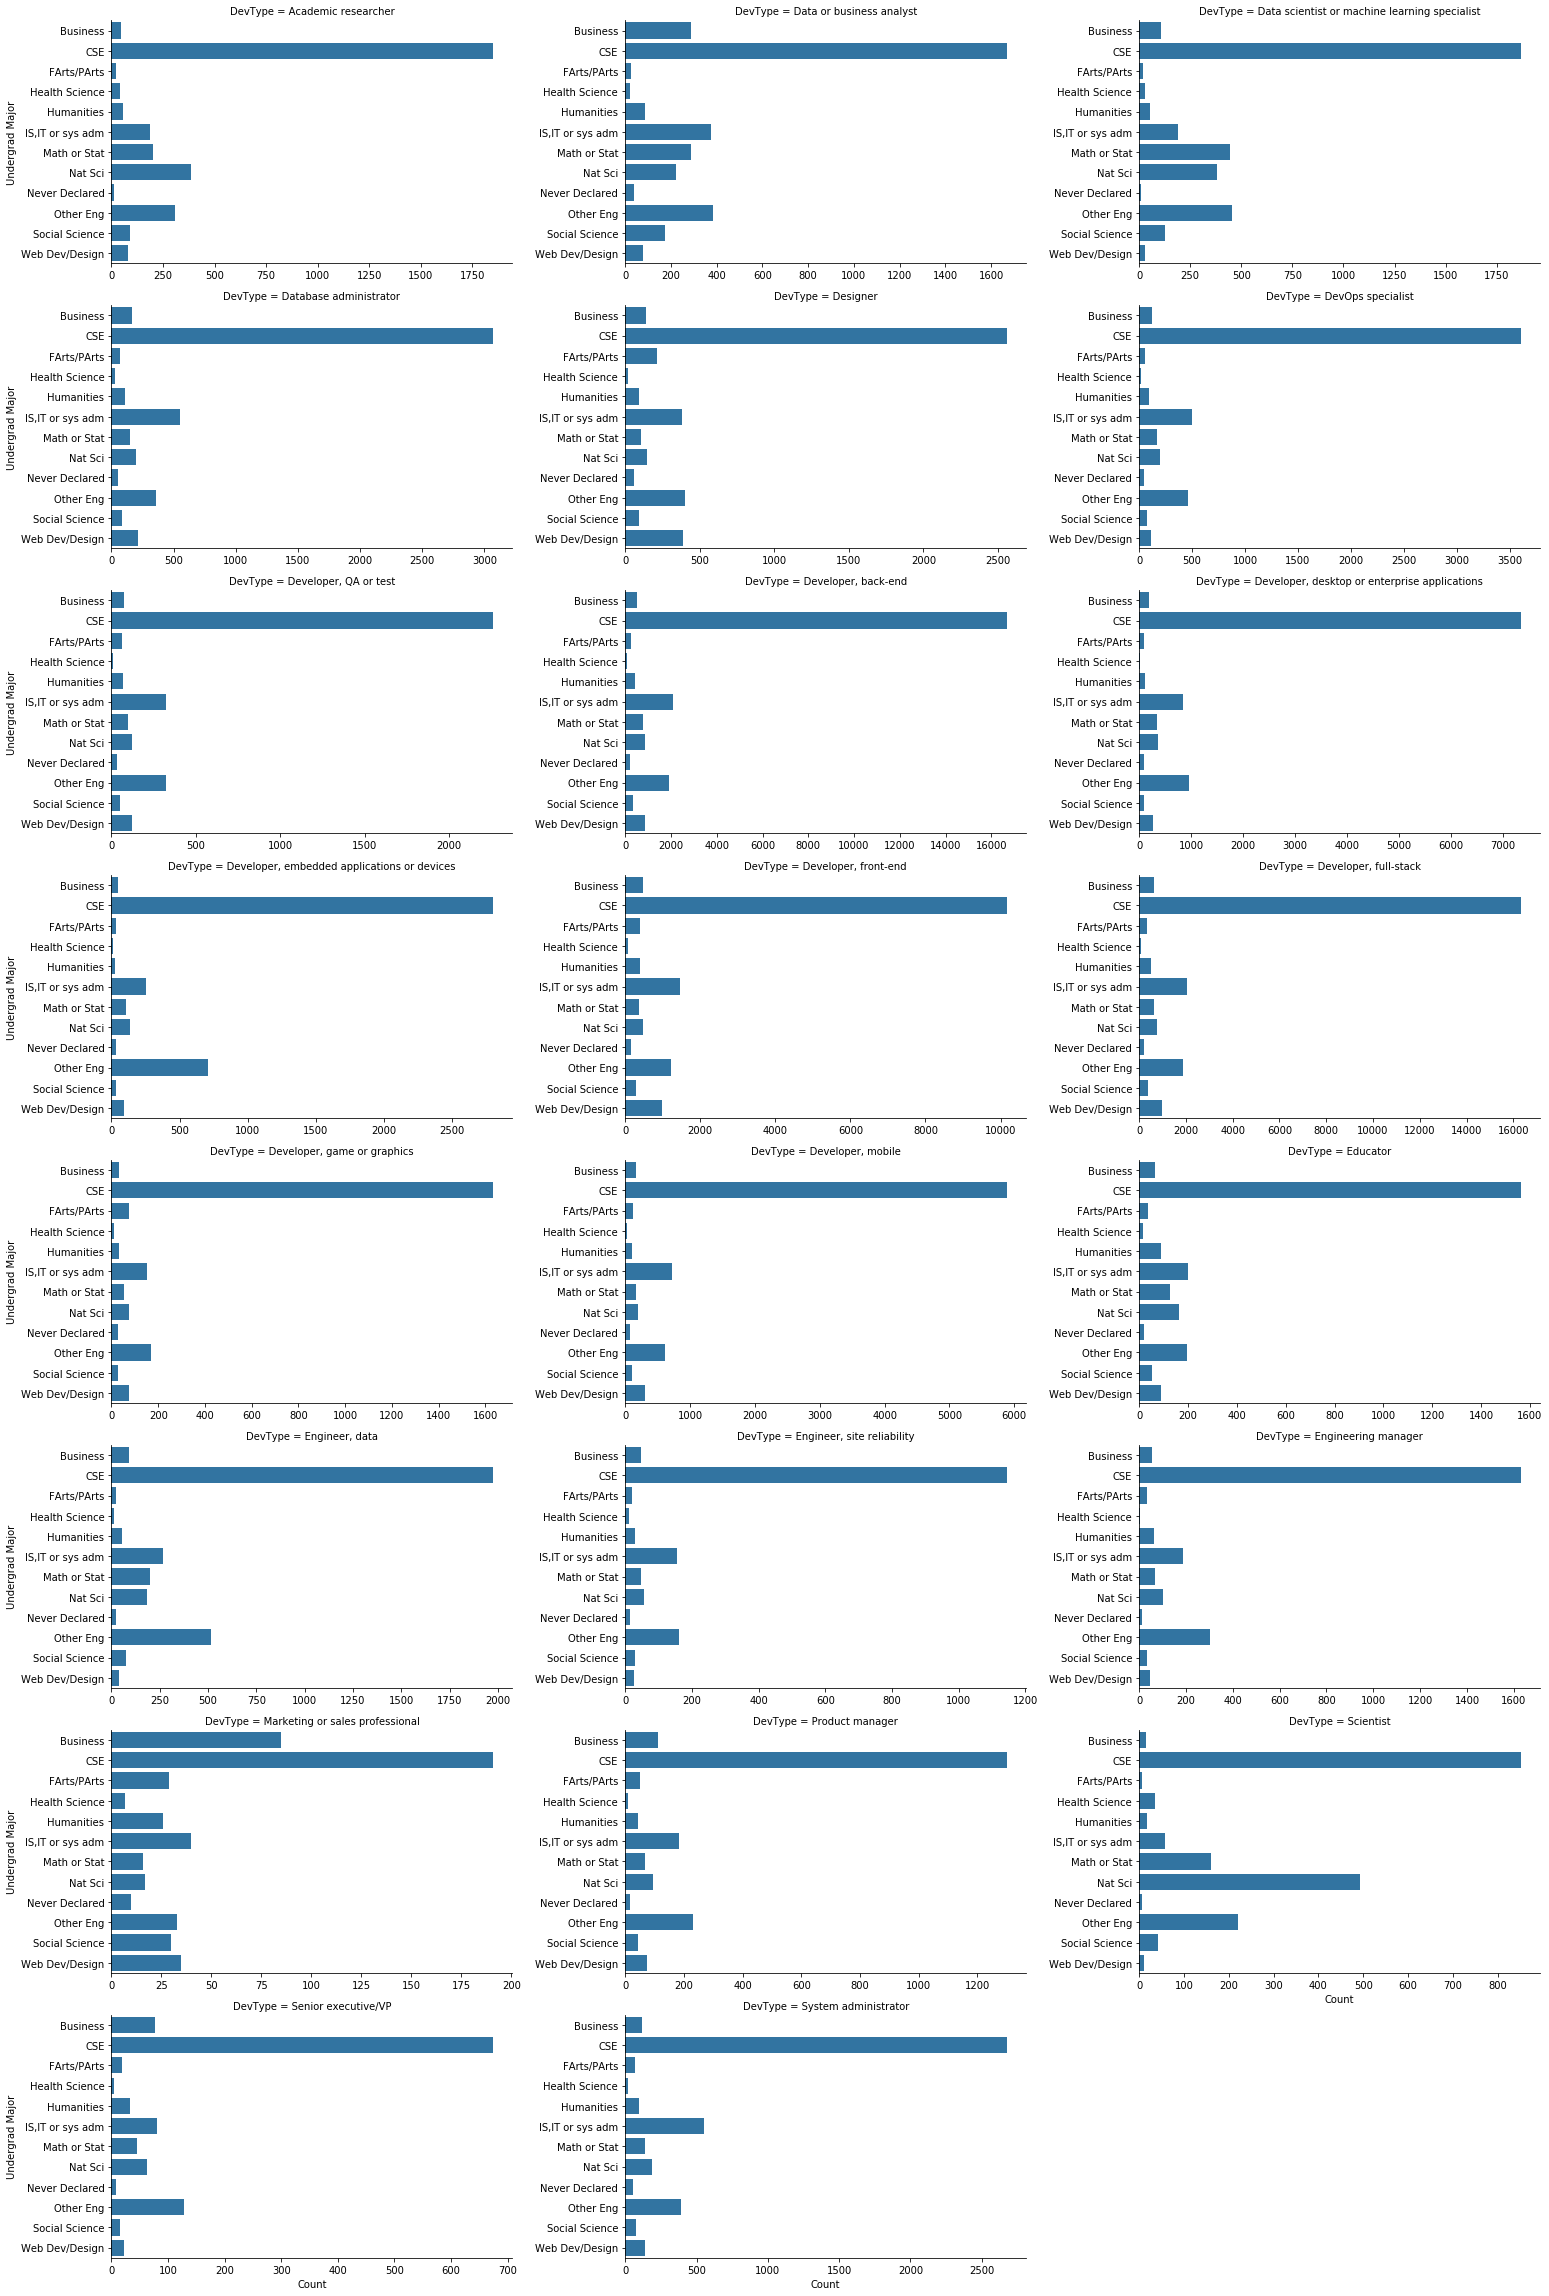

In [16]:
data = survey_devMajor_grp.copy()
data.columns = ['DevType', 'Undergrad Major', 'Count']
g = sns.FacetGrid(data,
                 col = 'DevType',
                 sharex = False,
                  sharey = False,
                  col_wrap = 3,
                 height = 4,
                 aspect =1.8 )

g = g.map(sns.barplot, 'Count','Undergrad Major');

Computer science is the dominant major in all of the 23 development types listed. The dominance of computer science is attributed to the fact that the respondents are developers and it is likely that most of them will have a computer science background. Another possible reason is the fact that respondents listed more than one development role, and their responses were recorded in alphabetical order which leaves no information about main and subsidiary roles. while computer science majors might be involved in all of the development positions listed, some roles are merely secondary positions. While CS majors dominate the roles, the relative dominance of other majors are seen in some domain specific roles like system administrator where Information System, Information Technology or System Admin is the second most dominant undergrad degree. And scientist, where natural science is the second most dominant degree followed by other engineering and Math or Stat. The same is true for Marketing or sales professional where Business degree is the second most dominating degree. 


### 2. Ethnicity and Gender Distribution

In [17]:
get_schema('Ethnicity')

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [18]:
unique_ethnic = get_unique(survey.Ethnicity,';')
ethnic_counts = survey.Ethnicity.value_counts().reset_index()
ethnic_counts.rename(columns = {'index' :'group',
                    'Ethnicity' : 'count'}, inplace = True)

In [19]:
def count_unique(df,col1,col2,unique_col1):
    """
    (df,col1,col2,unique_col1) -> df_of_counts

    fxn takes df containing col1 and col2, and unique values of col1 <which is unique_col1>
    and returns df_of_counts which is a df of the frequency of each item of unique_col1 in the
    original df

    """
    counter = {}
    for item in unique_col1:
        counter[item] = 0
        for idx in range(len(df)):
            if item in df[col1][idx]:
                counter[item] += df[col2][idx]
    counter_df = pd.DataFrame(pd.Series(counter)).reset_index()
    counter_df.columns = [col1, col2]
    return counter_df

In [20]:
ethnic_groups = count_unique(ethnic_counts, 'group','count', unique_ethnic).sort_values('count', ascending=False)
ethnic_groups.columns = ['Ethnicity', 'count']
ethnic_groups

,Ethnicity,count
3,White or of European descent,31380
0,South Asian,4767
9,Hispanic or Latino/a/x,3484
6,Middle Eastern,2272
2,East Asian,2122
1,Black or of African descent,2062
7,Southeast Asian,2049
8,Multiracial,796
5,Biracial,572
4,"Indigenous (such as Native American, Pacific I...",383


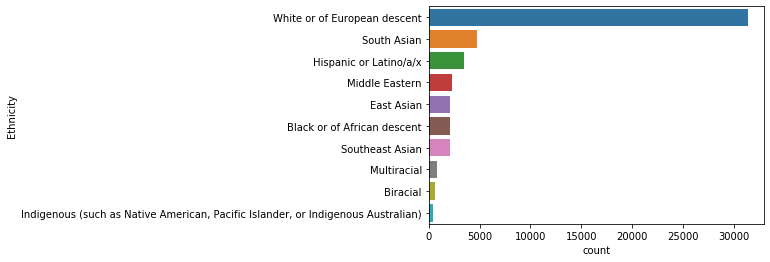

In [21]:
sns.barplot(data = ethnic_groups, y = 'Ethnicity', x = 'count');

In [22]:
ethnic_groups['percentage'] = ethnic_groups['count'] * 100/sum(ethnic_groups['count'])


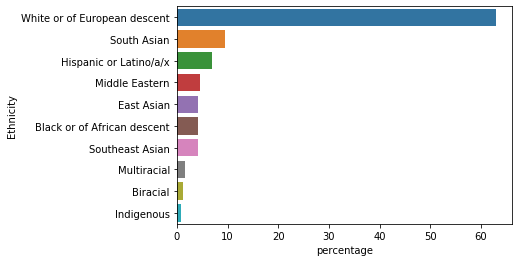

In [23]:
# Indegenous renamed for easy visualization
ethnic_groups.replace({"Ethnicity":{'Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)':
                                   'Indigenous'}}, inplace = True)
sns.barplot(data = ethnic_groups, y = 'Ethnicity', x = 'percentage');

The dominant Ethnicity among the respondents is White or of European descent with a proportion of 62% followed by South Asian and Hispanic or Latino representing 10% and 7% respectively.

## 3. How often do developers seek help online?

In [24]:
survey.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,DevTypeCount,und_major
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27,300.0,CSE
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4,363.0,CSE
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN,NaN,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack 

In [25]:
get_schema('SOVisitFreq')

'How frequently would you say you visit Stack Overflow?'

In [26]:
stackOver = survey.SOVisitFreq.value_counts().reset_index()
stackOver.columns = ['SO_visit', 'count']
stackOver['percentage'] = stackOver['count'] * 100 / sum(stackOver['count'])
stackOver.columns = ['Stack Overflow visit','count','percentage']
stackOver

,Stack Overflow visit,count,percentage
0,Daily or almost daily,17372,30.493242
1,Multiple times per day,16273,28.564157
2,A few times per week,13493,23.684395
3,A few times per month or weekly,7901,13.868703
4,Less than once per month or monthly,1739,3.052484
5,I have never visited Stack Overflow (before to...,192,0.337019


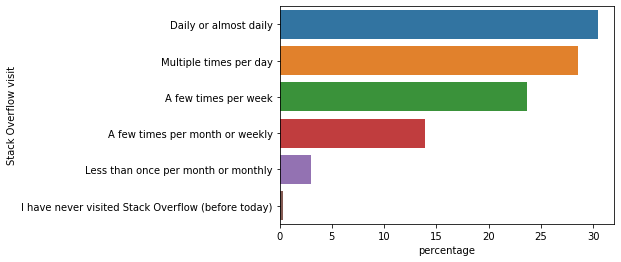

In [27]:
sns.barplot(data = stackOver, y = 'Stack Overflow visit', x = 'percentage');

30% of respondents visit stackoverflow daily, while 29% of the respondents visit multiple times per day and 24% visit a few times per week. The frequency of visiting stackoverflow indicates how often developers look for help online or provide help online. 83% of the respondents visit stackoverflow at least a few times per week. This shows that professional developers also look for help and a young developer should not lose heart if he finds himself searching online for even the basic syntax.